# Protection of the personal information provided by customers

In [3]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [106]:
# function for generation of inverse matrix of random values

def get_random_matrix(rows, cols):
    matrix = np.random.normal(size=(rows, cols))
    try:
        inv_matrix = np.linalg.inv(matrix)
        return matrix, inv_matrix
    except:
        get_random_matrix(rows, cols)

## Data description

In [4]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('/Users/anshilina/Documents/insurance.csv')

In [108]:
display(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [109]:
display(df.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [111]:
df.columns = ['Gender', 'Age', 'Salary', 'Family members', 'Insurance payments']

In [112]:
df['Age'] = df['Age'].astype('int')

In [113]:
print('Number of missing values:', df.isna().sum().sum())

Number of missing values: 0


In [114]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 153


In [115]:
df.drop_duplicates(inplace=True)

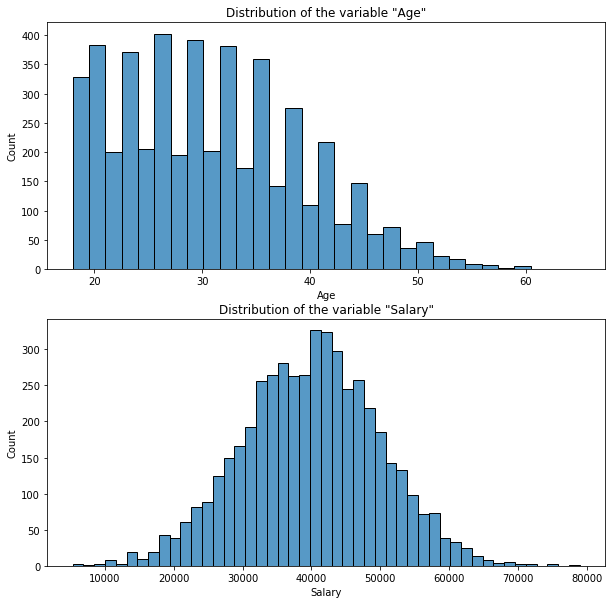

In [116]:
col_names = ['Age', 'Salary']
_, axs = plt.subplots(2, 1, figsize=(10,10))
axs = axs.ravel()

for i in range(len(col_names)):
    ax = axs[i]
    sns.histplot(ax=ax, x=df[col_names[i]], data=df)
    ax.tick_params(axis='x')
    ax.set_title(f'Distribution of the variable "{col_names[i]}"')

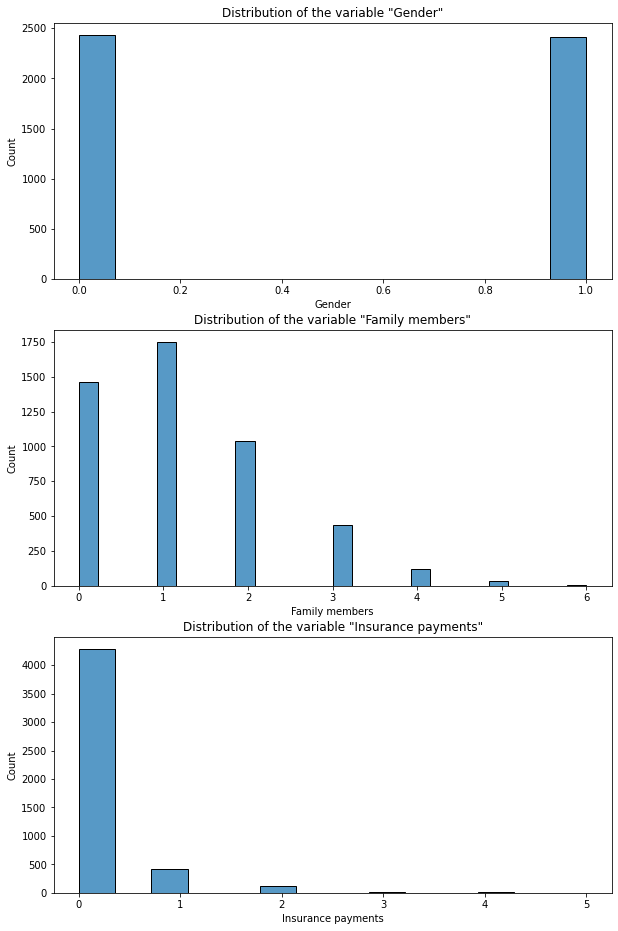

In [117]:
col_names = ['Gender', 'Family members', 'Insurance payments']
_, axs = plt.subplots(3, 1, figsize=(10,16))
axs = axs.ravel()

for i in range(len(col_names)):
    ax = axs[i]
    sns.histplot(ax=ax, x=df[col_names[i]], data=df)
    ax.tick_params(axis='x')
    ax.set_title(f'Distribution of the variable "{col_names[i]}"')

**Summary:** There are 5 thousand observations in total, 153 of which are duplicates - we dropped them from the sample. There are no missing values. After studying variables, we concluded that the values of the `Age` can be converted to integer. Variable `Gender` is binary - there are the same number of men and women in the sample. Variables `Family members` and `Insurance payments` are discrete ones. The majority of people in the sample has 1 member of the family. There are little large families (5-6 people). In most cases, people did not receive any insurance payments, since there were no insured events.

In [118]:
display(df.corr())

,Gender,Age,Salary,Family members,Insurance payments
Gender,1.000000,0.001953,0.015456,-0.007315,0.011565
Age,0.001953,1.000000,-0.017386,-0.009064,0.654964
Salary,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Family members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Insurance payments,0.011565,0.654964,-0.013123,-0.039303,1.000000


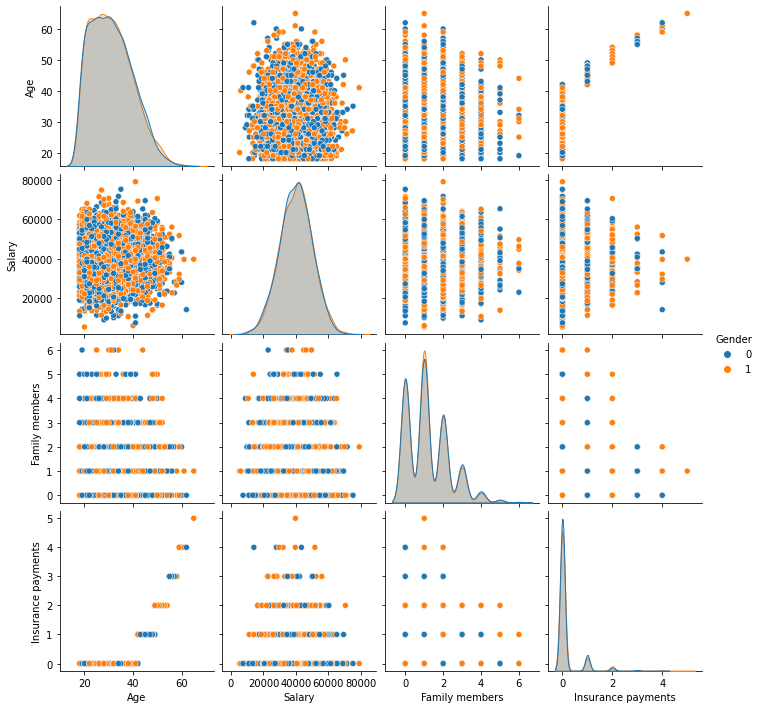

In [119]:
sns.pairplot(df, hue='Gender')
plt.show()

**Summary:** Feature variables are not correlated, i.e. there is no ьulticollinearity. Multicollinearity is a problem because it distorts the statistical significance of the independent variable. However, it does not harm Decision Tree and Random Forest models. Multicollinearity causes overfitting of linear models. What is more, if there is a multicollinearity it means that the model has excessive variables that are not benefisial for fitting. These unnessesary variables only increases the fitting time and make it difficult to interpret the results.

## Matrix multiplication

If we multiply the features by an invertible matrix, we will encode information provided by customers and the quality of the linear regression will not change.

**Argumentation:** Linear regression is indifferent to features' scale changes. Therefore, if we multiply the feature matrix by an invertible square matrix with random values from a normal distribution, the features will not change relative to each other – their weight will remain the same, therefore, this data manipulation will not affect linear regression coefficients. At the same time, if we need to decode the data, we can multiply the resulting matrix by its inverse. Thus, we can safely use feature scaling (StandardScaler, etc.) to scale features and it will not affect the outcomes of our model.

Therefore, the linear regression on encoded data will be solved as follows:

Designations:

- $X$ - feature matrix (zero column consists of ones)

- $R$ – matrix of random values by which features are multiplied

- $y$ — target feature vector

- $w$ — vector of linear regression weights (zero element equals intercept)

Predictions:

$$
a1 = Xw1
$$

$$
a2 = XRw2
$$

Model fitting:

$$
w1 = \arg\min_w MSE(Xw, y)
$$

$$
w2 = \arg\min_w MSE(XRw, y)
$$

$$
w1 = (X^T X)^{-1} X^T y
$$

$$
w2 = ((XR)^T (XR))^{-1} (XR)^T y
$$


Properties of Matrix Multiplication:

$$ 
A * B * C = A * (B * C) 
$$ 

$$ 
(A * B)^T = B^T * A^T 
$$ 

$$
(A * B)^{-1} = B^{-1} * A^{-1}
$$ 

$$ 
A * A^{-1} = E
$$ 

Using these properties, let's find predictions on the encoded features matrix and compare with predictions on the initial features matrix:

$$
w2 = ((XR)^T (XR))^{-1} (XR)^T y = (R^T (X^T X) R)^{-1} R^T X^T y = R^{-1} (X^T X)^{-1} (R^T)^{-1} R^T X^T y = R^{-1} (X^T X)^{-1} X^T = R^{-1} w1
$$

$$
a2 = X R R^{-1} w1 = X w1
$$

## Conversion algorithm

**Algorithm:**

* Create a square matrix of random values. The size of the matrix corresponds to the number of features.
* Test matrix for invertibility. If it is not invertible, continue to generate matrices until we get a invertible one.
* Encode the data: multiply the features matrix by the matrix of random values, save the resulting features.
* Fit linear regression model on new data, calculate the R2 score.
* Fit linear regression model on the initial data, calculate the R2 score.
* Compare the scores obtained from the results of two models - we expect them to match.

## Algorithm testing

In [120]:
features = df.drop('Insurance payments', axis=1)
target = df['Insurance payments']

In [121]:
random_matrix, inv_matrix = get_random_matrix(features.shape[1], features.shape[1])

In [122]:
# get encoded features 

features_safe = features @ random_matrix

In [123]:
display(features_safe.head())

,0,1,2,3
0,-64611.111156,-30395.432003,62524.486849,1700.894283
1,-49471.609169,-23277.174350,47899.422484,1297.552355
2,-27332.451756,-12862.026450,26470.111276,716.442990
3,-54347.093792,-25561.495112,52567.067492,1433.024471
4,-33986.169081,-15990.877226,32900.542841,893.575865


In [124]:
# split sample into train and test subsets
features_train, features_test, target_train, target_test = \
                                        train_test_split(features, target, test_size=0.25, random_state=42)

# the same algorithm for encoded data
features_safe_train, features_safe_test, target_safe_train, target_safe_test = \
                                        train_test_split(features_safe, target, test_size=0.25, random_state=42)

In [125]:
pipe = Pipeline([('scaler', StandardScaler()), ('lin_model', LinearRegression())])

In [126]:
# R2 score on encoded data

pipe.fit(features_safe_train, target_safe_train)
print(r2_score(target_safe_test, pipe.predict(features_safe_test)))

0.44346330831610503


In [127]:
# R2 score on initial data

pipe.fit(features_train, target_train)
print(r2_score(target_test, pipe.predict(features_test)))

0.44346330831611935


**Summary:** Our algorithm works: the model predicts equally well encoded and unencoded data. R2 score are almost identical, the difference is observed only in 13th digit, which may be due to the fact that some features have a float type.

Finally, we created a class `EncoderMatrix` that can be used to encode data in the future. 

In [133]:
class EncoderMatrix(TransformerMixin, BaseEstimator):
    def __init__(self, variables):
        self.variables = variables
        size = len(variables)
        
        def get_matrix(rows, cols):    
            matrix = np.random.normal(size=(rows, cols))
            try:
                inv_matrix = np.linalg.inv(matrix)
                return matrix
            except:
                get_matrix(rows, cols)
        
        self.matrix = get_matrix(size, size)
    
    def fit(self, feature, target):
        return self
    
    def transform(self, features):
        features_transformed = features.drop(self.variables, axis=1)
        features_transformed[self.variables] = features[self.variables] @ self.matrix
        return features_transformed

We can use `Pipeline` that combines all stages of preprocessing.

In [134]:
pipe_final = Pipeline([('encoder', EncoderMatrix(features.columns)), 
                       ('scaler', StandardScaler()), 
                       ('lin_model', LinearRegression())])

In [135]:
pipe_final.fit(features_train, target_train)

Pipeline(steps=[('encoder',
                 EncoderMatrix(variables=Index(['Gender', 'Age', 'Salary', 'Family members'], dtype='object'))),
                ('scaler', StandardScaler()),
                ('lin_model', LinearRegression())])

In [136]:
print(r2_score(target_test, pipe_final.predict(features_test)))

0.4434633083160967


## Conclusion

In this project we used data provided by clients of an insurance company. To beging with, missing values were not found in dsts, but duplicates were detected and removed. Data type of some variables was also changed. Finally, multicollinearity test was carried out. The target variable is the number of insurance payments, the features are the sex, age, salary, the number of family members.

Next, we tested the assumption that multiplication of features matrix by an invertible matrix (to encode data) will not affect the results of linear regression. This assumption was proven mathematically. As the result, algorithm for testing this assumption on real data was developed. This algorithm includes:

* Generation of inversible square matrix of random values
* Data encoding: multiplying the features matrix by the matrix of random values
* Fitting models on the original and encoded data, comparing the R2 scores 

Finally, the algorithm implementation results were presented. Our assumptions were confirmed: the quality metrics obtained on encoded and original data are almost the same (the difference in the 13th digit was considered as insignificant).